In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('deaths_malaysia.csv')

## print the top5 records
df.head()

,date,deaths_new_dod,deaths_bid,deaths_bid_dod
0,43907,2,2,0
1,43908,0,0,0
2,43909,0,0,0
3,43910,1,1,0
4,43911,4,4,0


In [3]:
df.head()

,date,deaths_new_dod,deaths_bid,deaths_bid_dod
0,43907,2,2,0
1,43908,0,0,0
2,43909,0,0,0
3,43910,1,1,0
4,43911,4,4,0


In [6]:
df.shape

(554, 4)

In [7]:
df.dtypes

date              int64
deaths_new_dod    int64
deaths_bid        int64
deaths_bid_dod    int64
dtype: object

In [8]:
df.isnull().sum()

date              0
deaths_new_dod    0
deaths_bid        0
deaths_bid_dod    0
dtype: int64

In [9]:
df.describe()

,date,deaths_new_dod,deaths_bid,deaths_bid_dod
count,554.000000,554.000000,554.000000,554.000000
mean,44183.500000,43.462094,43.462094,8.389892
std,160.070297,89.968225,82.669736,22.167119
min,43907.000000,0.000000,0.000000,0.000000
25%,44045.250000,1.000000,1.000000,0.000000
50%,44183.500000,4.000000,4.000000,1.000000
75%,44321.750000,22.750000,23.000000,4.000000
max,44460.000000,592.000000,387.000000,176.000000


In [10]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  4


,date,deaths_new_dod,deaths_bid,deaths_bid_dod
0,43907,2,2,0
1,43908,0,0,0
2,43909,0,0,0
3,43910,1,1,0
4,43911,4,4,0


In [11]:
# list of variables that contain cases feature information
deaths_feature = [feature for feature in numerical_features if 'deaths_new_dod' in feature or 'deaths_bid' in feature or 'deaths_bid_dod' in feature]

deaths_feature

['deaths_new_dod', 'deaths_bid', 'deaths_bid_dod']

In [12]:
# let's explore the content of these year variables
for feature in deaths_feature:
    print(feature, df[feature].unique())

deaths_new_dod [  2   0   1   4   5   3   6   7  11   9  10   8  16  15  14  12  18  13
  21  17  19  24  23  39  20  22  25  26  27  34  44  36  45  47  46  59
  50  49  61  60  63  98  79  67  71 126 103  86 109  87  82  76  75  73
  84  64 101  74  72  69  77  83  81  57 107  62  91 135  90 125 118 110
 115 138 153 129  93 199 134 144 184  92 207 143 174 165 160 219 195 257
 164 210 360 212 201 211 318 277 260 282 274 293 225 178 233 223 232 265
 393 339 252 285 295 278 249 330 362 336 272 311 322 341 592 292 413 463
 422 346 388 324 376 301 334]
deaths_bid [  2   0   1   4   5   3   6   7  11   9  10   8  12  17  13  14  15  16
  19  20  18  22  23  21  30  27  29  35  43  50  38  44  48  51  58  52
  46  60  84  69  66  74  91  63 105  75 109  96  93  86 110  83  90  79
  82  73  68  65  80  78  67  81  88  72 107 116 112 152 155 178 148 181
 169 190 171 207 204 252 231 210 266 260 255 279 294 296 257 259 300 277
 317 297 309 358 325 302 301 338 321 387 265 282 229 241 251 240 256

In [13]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in cases_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


Text(0.5, 1.0, 'deaths_new_dod vs date')

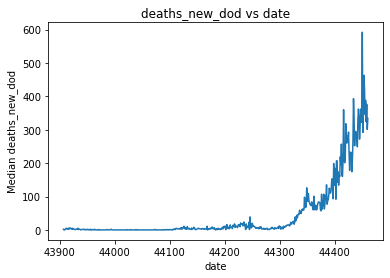

In [14]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between deaths_new_dod and date

df.groupby('date')['deaths_new_dod'].median().plot()
plt.xlabel('date')
plt.ylabel('Median deaths_new_dod')
plt.title("deaths_new_dod vs date")

Text(0.5, 1.0, 'deaths_bid vs date')

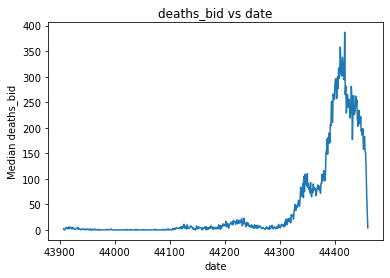

In [15]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between deaths_bid and date

df.groupby('date')['deaths_bid'].median().plot()
plt.xlabel('date')
plt.ylabel('Median deaths_bid')
plt.title("deaths_bid vs date")

Text(0.5, 1.0, 'deaths_bid_dod vs date')

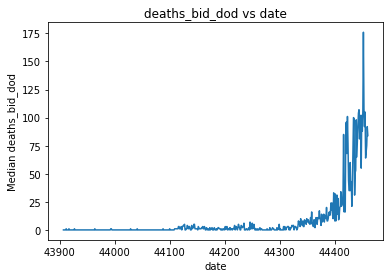

In [16]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between deaths_bid_dod and date

df.groupby('date')['deaths_bid_dod'].median().plot()
plt.xlabel('date')
plt.ylabel('Median deaths_bid_dod')
plt.title("deaths_bid_dod vs date")

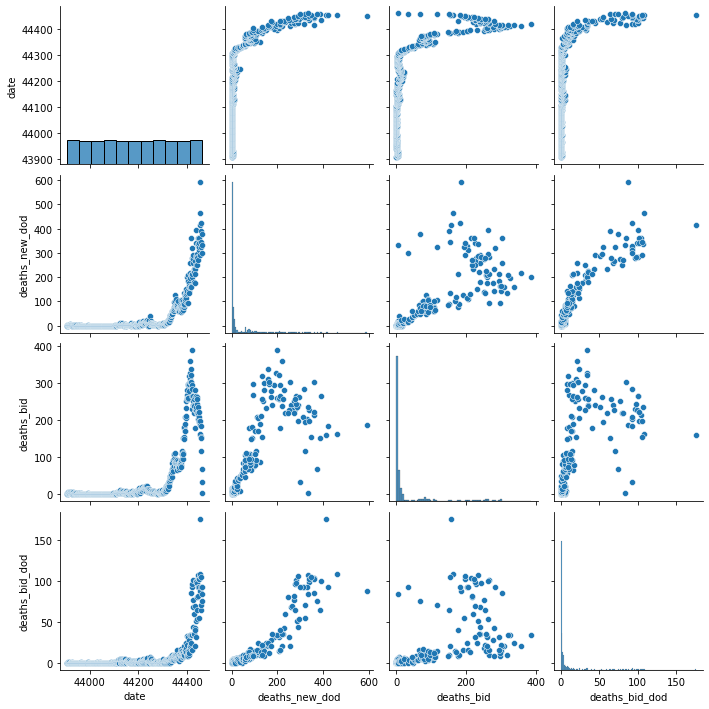

In [79]:
sns.pairplot(df)

In [80]:
df.corr()

,date,deaths_new_dod,deaths_bid,deaths_bid_dod
date,1.000000,0.663688,0.687866,0.544048
deaths_new_dod,0.663688,1.000000,0.824736,0.923406
deaths_bid,0.687866,0.824736,1.000000,0.667466
deaths_bid_dod,0.544048,0.923406,0.667466,1.000000


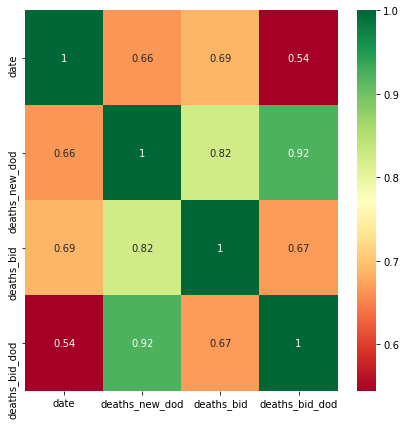

In [81]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Feature Selection

In [83]:
# Importing the dataset
df = pd.read_csv('deaths_malaysia.csv')
X = df.iloc[:, :-1] ## independent features
y = df.iloc[:, 3]   ## dependent features

In [ ]:
# Drop the state coulmn
X=X.drop('State',axis=1)

In [84]:
# View of the data head
X.head()

,date,deaths_new_dod,deaths_bid
0,43907,2,2
1,43908,0,0
2,43909,0,0
3,43910,1,1
4,43911,4,4


In [85]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [86]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [87]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [88]:
prediction=regressor.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths_bid_dod', ylabel='Density'>

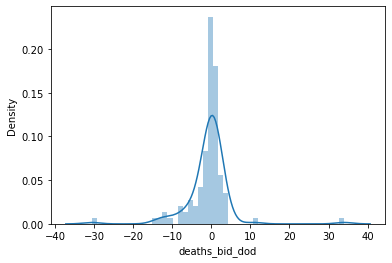

In [89]:
sns.distplot(y_test-prediction)

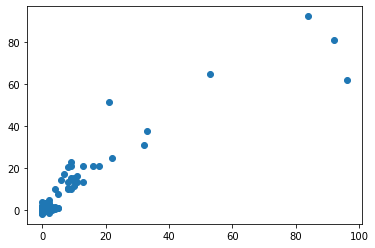

In [90]:
plt.scatter(y_test,prediction)

In [91]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [92]:
score.mean()

0.8732331442431929